In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from pandas import compat 

In [3]:
import datetime as dt
from datetime import timedelta, date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [21]:
# Dates - August 10th-20th

In [22]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [23]:
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [24]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

measurement_data = engine.execute("SELECT * FROM measurement").fetchall()
measurement_data

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [26]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [27]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [28]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [29]:
session.query(Measurement.date).\
    filter(Measurement.date>'2009-01-01').\
    order_by(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'

In [30]:
query_date = dt.date(2017,8,23)-dt.timedelta(days=366)
query_date

datetime.date(2016, 8, 22)

In [33]:
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>query_date).\
    order_by(Measurement.date).all()

prcp_data_df=pd.DataFrame(prcp_data)

prcp_df = prcp_data_df.set_index('date')

prcp_df.loc[prcp_df['prcp'].idxmax()]

,prcp
date,
2016-09-14,1.32
2016-09-14,0.90
2016-09-14,1.84
2016-09-14,NaN
2016-09-14,1.19
2016-09-14,2.33
2016-09-14,6.70


In [34]:
# convert to dict for FLASK
def to_dict_dropna(data):
    return dict((k, v.dropna().to_dict()) for k, v in compat.iteritems(data))

data = prcp_df
prcp_dict=to_dict_dropna(data)

In [35]:
prcp_dict

{'prcp': {'2016-08-23': 0.7,
  '2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.01,
  '2016-08-27': 0.12,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.04,
  '2016-10

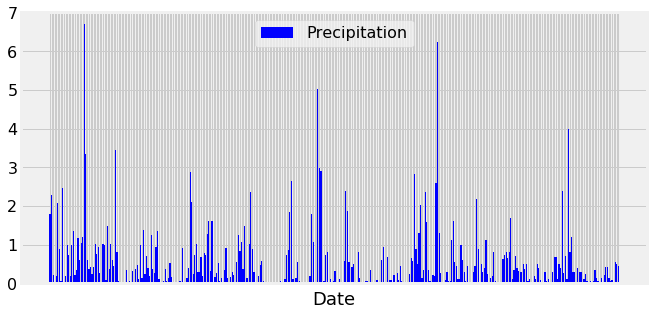

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.rcParams["figure.figsize"]=[10,5]
plt.rcParams["font.size"]=16

twelve_mth_fig, twelve_mth_ax = plt.subplots()

twelve_x_axis = prcp_df.index.values
twelve_y_data = prcp_df["prcp"]

twelve_mth_plot = plt.bar(twelve_x_axis,twelve_y_data,label="Precipitation",color='b')

twelve_mth_ax.set_xticklabels([])
plt.xlabel('Date',fontsize=18)
plt.legend(loc="upper center")

plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
twelve_precip = pd.DataFrame(prcp_df["prcp"])
twelve_precip.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [38]:
# ********** Temperature Query for FLASK ONLY ******************

In [39]:
# Design a query to retrieve the last 12 months of temperature data and plot the results

tobs_flask_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date>query_date).\
    order_by(Measurement.date).all()

tobs_flask_df=pd.DataFrame(tobs_flask_data)


tobs_flask_df = tobs_flask_df.set_index('date')
tobs_flask_df.head()

data = tobs_flask_df
tobs_dict=to_dict_dropna(data)
tobs_dict

{'tobs': {'2016-08-23': 74.0,
  '2016-08-24': 74.0,
  '2016-08-25': 77.0,
  '2016-08-26': 80.0,
  '2016-08-27': 74.0,
  '2016-08-28': 71.0,
  '2016-08-29': 78.0,
  '2016-08-30': 75.0,
  '2016-08-31': 76.0,
  '2016-09-01': 77.0,
  '2016-09-02': 75.0,
  '2016-09-03': 75.0,
  '2016-09-04': 73.0,
  '2016-09-05': 76.0,
  '2016-09-06': 73.0,
  '2016-09-07': 74.0,
  '2016-09-08': 74.0,
  '2016-09-09': 75.0,
  '2016-09-10': 75.0,
  '2016-09-11': 71.0,
  '2016-09-12': 72.0,
  '2016-09-13': 75.0,
  '2016-09-14': 73.0,
  '2016-09-15': 73.0,
  '2016-09-16': 73.0,
  '2016-09-17': 76.0,
  '2016-09-18': 75.0,
  '2016-09-19': 70.0,
  '2016-09-20': 70.0,
  '2016-09-21': 73.0,
  '2016-09-22': 73.0,
  '2016-09-23': 73.0,
  '2016-09-24': 77.0,
  '2016-09-25': 76.0,
  '2016-09-26': 74.0,
  '2016-09-27': 74.0,
  '2016-09-28': 77.0,
  '2016-09-29': 77.0,
  '2016-09-30': 73.0,
  '2016-10-01': 74.0,
  '2016-10-02': 73.0,
  '2016-10-03': 76.0,
  '2016-10-04': 74.0,
  '2016-10-05': 75.0,
  '2016-10-06': 75.0,
  

In [40]:
station_data = engine.execute("SELECT * FROM station").fetchall()
station_data

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [41]:
# Station data to FLASK
station_data_df=pd.DataFrame(station_data,columns=['Index','Station','Station Desc','Latitude','Longitude','Elevation'])
station_dict=station_data_df.to_dict('split')
station_dict

{'index': [0, 1, 2, 3, 4, 5, 6, 7, 8],
 'columns': ['Index',
  'Station',
  'Station Desc',
  'Latitude',
  'Longitude',
  'Elevation'],
 'data': [[1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0],
  [2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6],
  [3,
   'USC00514830',
   'KUALOA RANCH HEADQUARTERS 886.9, HI US',
   21.5213,
   -157.8374,
   7.0],
  [4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9],
  [5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6],
  [6,
   'USC00519523',
   'WAIMANALO EXPERIMENTAL FARM, HI US',
   21.33556,
   -157.71139,
   19.5],
  [7,
   'USC00519281',
   'WAIHEE 837.5, HI US',
   21.45167,
   -157.84888999999998,
   32.9],
  [8,
   'USC00511918',
   'HONOLULU OBSERVATORY 702.2, HI US',
   21.3152,
   -157.9992,
   0.9],
  [9,
   'USC00516128',
   'MANOA LYON ARBO 785.2, HI US',
   21.3331,
   -157.8025,
   152.4]]}

In [42]:
# Design a query to show how many stations are available in this dataset?

station_count = engine.execute("SELECT COUNT(*) FROM station").fetchall()
station_count


[(9,)]

In [43]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
    
most_active = engine.execute("SELECT station, COUNT(*) as TotalRows FROM measurement GROUP BY station ORDER BY TotalRows Desc").fetchall()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Lowest Temperature Recorded

temps = engine.execute("SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE station = 'USC00519281'").fetchall()
temps

[(54.0, 85.0, 71.66378066378067)]

In [45]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [46]:
session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()

('2017-08-18')

In [47]:
station_query_date = dt.date(2017,8,18)-dt.timedelta(days=366)
station_query_date

datetime.date(2016, 8, 17)

In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



tobs_data = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    filter(Measurement.date>station_query_date).\
    filter(Measurement.station=='USC00519281').\
    group_by(Measurement.tobs).all()

tobs_data

tobs_data_df=pd.DataFrame(tobs_data, columns=['Temperature','Frequency'])

tobs_data_df.head()
tobs_data_df.sum()

Temperature    1775.0
Frequency       357.0
dtype: float64

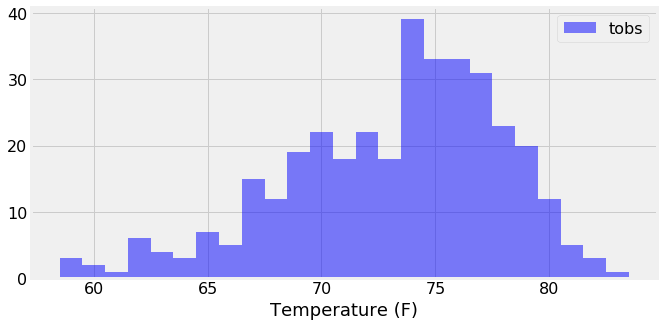

In [49]:
plt.rcParams["figure.figsize"]=[10,5]
plt.rcParams["font.size"]=16

histogram_fig, histogram_ax = plt.subplots()

histogram_x_axis = tobs_data_df["Temperature"]
histogram_y_data = tobs_data_df["Frequency"]

histogram_plot = plt.bar(histogram_x_axis,histogram_y_data,label="tobs",color='b',alpha=.5,width=1)

twelve_mth_ax.set_xticklabels([])
plt.xlabel('Temperature (F)',fontsize=18)
plt.legend(loc="best")

plt.show()

In [50]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
start_date = '2017-03-10'
end_date = '2017-03-17'

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
avg_temps = calc_temps(start_date,end_date)
avg_temps_df = pd.DataFrame(avg_temps, columns=['Min','Avg','Max'])
avg_temps_df.head()

,Min,Avg,Max
0,65.0,71.64,82.0


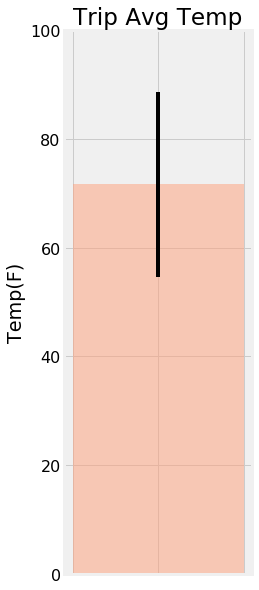

In [51]:
plt.rcParams["figure.figsize"]=[3,10]
plt.rcParams["font.size"]=16

trip_fig, trip_ax = plt.subplots()

trip_y_data = avg_temps_df['Avg']
trip_err=avg_temps_df['Max'] - avg_temps_df['Min']

trip_plot = plt.bar(1,trip_y_data,label="Trip Avg Temp",color='lightsalmon',alpha=.5,width=1,yerr=trip_err)

trip_ax.set_xticklabels([])
trip_ax.set_title('Trip Avg Temp')
trip_ax.set_ylabel('Temp(F)')
trip_ax.set_ylim([0,100])
#plt.ylabel('Temperature (F)',fontsize=18)
#plt.legend(loc="best")

plt.show()

In [52]:
start_date = '2017-03-10'
end_date = '2017-03-17'

def calc_prcp(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(Measurement.station,func.sum(Measurement.prcp)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        group_by(Measurement.station).all()

# function usage example
tot_prcp_station = calc_prcp(start_date,end_date)
tot_prcp_station_df = pd.DataFrame(tot_prcp_station, columns=['Station','Total'])
tot_prcp_station_df2 = tot_prcp_station_df.set_index(['Station'],drop=True)
tot_prcp_station_df2.head()

,Total
Station,
USC00513117,0.35
USC00514830,0.19
USC00516128,0.00
USC00517948,0.06
USC00519281,0.22


In [53]:
station_data_df=pd.DataFrame(station_data,columns=['Index','Station','Station Desc','Latitude','Longitude','Elevation'])
station_data_df2=station_data_df.set_index(['Station'],drop=True)
station_data_df3 = station_data_df2.drop(columns="Index")
station_data_df3.head()

,Station Desc,Latitude,Longitude,Elevation
Station,,,,
USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [54]:
station_precip_trip=station_data_df3.merge(tot_prcp_station_df2,left_on="Station", right_on="Station")
station_precip_trip2=station_precip_trip.sort_values(by=['Total'],ascending=False)
station_precip_trip2.head()

,Station Desc,Latitude,Longitude,Elevation,Total
Station,,,,,
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.35
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.22
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.19
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.06


## Optional Challenge Assignment

In [55]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
date = '08-15'

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals(date)

[(69.0, 76.47169811320755, 83.0)]

In [67]:
days = []
date_table = pd.DataFrame({'Date':[]})
normals = pd.DataFrame({'Min':[],'Avg':[],'Max':[]})
normals_list = []

start_date = dt.date(2017,3,10)
end_date = dt.date(2017,3,17)
    

def daterange( start_date, end_date ):

    for n in range( ( end_date - start_date ).days + 1 ):
        yield start_date + dt.timedelta( n )

for date in daterange( start_date, end_date ):
    if date.month<10:
        days.append(f'0{date.month}-{date.day}')
        date_table = date_table.append({'Date':date}, ignore_index=True)
    else:
        days.append(f'{date.month}-{date.day}')
        date_table = date_table.append({'Date':date}, ignore_index=True)
    
daterange(start_date,end_date)

for date in days:
    tobs_min = session.query(func.min(Measurement.tobs)).\
    filter(func.strftime("%m-%d", Measurement.date) == date).all()
    tobs_avg = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime("%m-%d", Measurement.date) == date).all()
    tobs_max = session.query(func.max(Measurement.tobs)).\
    filter(func.strftime("%m-%d", Measurement.date) == date).all()
    normals = normals.append({'Min':tobs_min,'Avg':tobs_avg,'Max':tobs_max},ignore_index=True)

In [68]:
days

['03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17']

In [69]:
date_table

,Date
0,2017-03-10
1,2017-03-11
2,2017-03-12
3,2017-03-13
4,2017-03-14
5,2017-03-15
6,2017-03-16
7,2017-03-17


In [70]:
normals

,Min,Avg,Max
0,"[(57.0,)]","[(69.12280701754386,)]","[(75.0,)]"
1,"[(60.0,)]","[(69.89285714285714,)]","[(82.0,)]"
2,"[(62.0,)]","[(69.88888888888889,)]","[(80.0,)]"
3,"[(56.0,)]","[(69.29629629629629,)]","[(77.0,)]"
4,"[(62.0,)]","[(70.32758620689656,)]","[(77.0,)]"
5,"[(58.0,)]","[(68.54716981132076,)]","[(76.0,)]"
6,"[(60.0,)]","[(69.70370370370371,)]","[(78.0,)]"
7,"[(57.0,)]","[(68.54,)]","[(75.0,)]"


In [71]:
normals["Min"] = normals["Min"].str.strip("[")

In [72]:
normals

,Min,Avg,Max
0,NaN,"[(69.12280701754386,)]","[(75.0,)]"
1,NaN,"[(69.89285714285714,)]","[(82.0,)]"
2,NaN,"[(69.88888888888889,)]","[(80.0,)]"
3,NaN,"[(69.29629629629629,)]","[(77.0,)]"
4,NaN,"[(70.32758620689656,)]","[(77.0,)]"
5,NaN,"[(68.54716981132076,)]","[(76.0,)]"
6,NaN,"[(69.70370370370371,)]","[(78.0,)]"
7,NaN,"[(68.54,)]","[(75.0,)]"


In [61]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


<IPython.core.display.Javascript object>


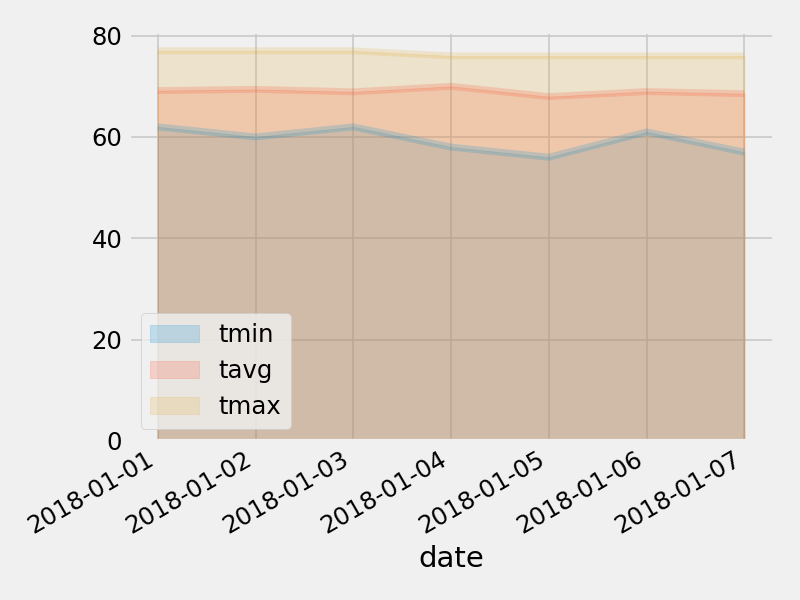

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
